<a href="https://colab.research.google.com/github/adalima/Data_Science_Portfolio/blob/master/Analisando_os_Dados_do_Airbnb_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Imagem Santos SP" width="800px" height="200px" src="https://2.bp.blogspot.com/-Z5Fu8QMjo0s/Vs8tHS2ofhI/AAAAAAAAAKw/NH01V7TYTpc/s1600/vancouver-_capa.png">



---

# Análise dos Dados do Airbnb - *Vancouver, British Columbia, Canadá*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

<div align="justify">

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. Com apenas quatro anos de existência, o Airbnb se tornou uma das principais plataformas de oferta de hospedagens do mundo. Hoje o serviço está presente em mais de 30 mil cidades e 192 países, oferecendo das opções mais convencionais até as mais inusitadas como iglus, casas em árvore, barcos entre outras.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Vancouver/Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**
</div>

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - Resumo de informações e métricas para listagens em Vancouver (bom para visualizações).

In [ ]:
# importa as bibliotecas necessarias.

# Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with structured 
# (tabular, multidimensional, potentially heterogeneous) and time series data both easy and intuitive.
import pandas as pd

# Matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes 
# some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# %Matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed 
# inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline


In [ ]:
# importa o arquivo listings.csv para um DataFrame.
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2020-05-11/visualisations/listings.csv")

In [ ]:
# verificando o arquivo CSV importado (5 linhas de referência).
# por padrão o comando trás as 5 primeiras linhas do arquivo importado, 
# quando não se especifica entre () a quantidade de linhas desejada.
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326


## Análise dos Dados
<div align="justify">

Esta fase permite compreender o contexto de onde os dados foram extraídos e como os mesmos foram estruturados, sendo:
</div>

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a estrutura do *dataset*, analisando as 10 primeiras entradas.

In [ ]:
# visualiza as 10 primeiras entradas, num total de 5.806.
# lembre-se de que, por padrão, as entradas se iniciam com o "0".
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326
5,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24974,-123.08108,Entire home/apt,140,3,33,2020-02-07,0.28,1,0
6,16254,Close to PNE/Hastings Park and East Village,63238,Jason,NaN,Hastings-Sunrise,49.27734,-123.04152,Entire home/apt,194,3,5,2019-08-19,0.23,1,73
7,17158,Vancouver 4br 3ba house 20min to DT,48673,Elaine,NaN,Renfrew-Collingwood,49.25195,-123.03550,Entire home/apt,135,4,5,2018-03-31,0.05,1,70
8,17765,"Central location, nice little apartment",68672,James,NaN,Mount Pleasant,49.26181,-123.10905,Entire home/apt,94,3,194,2019-12-30,2.09,1,0
9,18270,private rm in clean central 2BR apt,70437,Ran,NaN,Mount Pleasant,49.26564,-123.09524,Private room,55,30,118,2019-12-31,1.06,1,348


In [ ]:
# visualizando as 10 últimas entradas, num todal de 5.806.
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5796,43390666,Hotel in the Heart of Downtown w/ City Views,331399851,Gec,NaN,Downtown,49.277150,-123.127100,Private room,94,1,0,NaN,NaN,29,34
5797,43390889,Marvelous view! Great Studio in Downtown!,268160599,Irina,NaN,Downtown,49.278990,-123.128310,Entire home/apt,300,1,0,NaN,NaN,1,137
5798,43390903,"Modern 1 Bed, with Exceptional Views",95217850,Mauricio,NaN,Downtown,49.273730,-123.116140,Entire home/apt,110,30,0,NaN,NaN,13,365
5799,43391066,Modern 2 bedroom Executive apartment,95217850,Mauricio,NaN,Downtown,49.274450,-123.115710,Entire home/apt,159,30,0,NaN,NaN,13,364
5800,43391223,OAKRIDGE MALL STATION HOUSE,78442973,Chunguang,NaN,Oakridge,49.229790,-123.114780,Entire home/apt,700,2,0,NaN,NaN,1,364
5801,43392404,2 Bdrm 1 Living 1 Bath Suite in Vancouver Cen...,120173435,Bob,NaN,Kensington-Cedar Cottage,49.252250,-123.076680,Private room,75,1,0,NaN,NaN,2,88
5802,43393120,1 Bdrm 1 Living 1 Bath Suite in Vancouver Cen...,120173435,Bob,NaN,Kensington-Cedar Cottage,49.251130,-123.075520,Private room,62,1,0,NaN,NaN,2,171
5803,43397838,❤️Modern Luxury 1 BED + Parking-5 mins to Down...,229621112,Lauren,NaN,Mount Pleasant,49.271190,-123.102590,Entire home/apt,120,30,0,NaN,NaN,2,180
5804,43398606,Private room in Vancouver - 1A (Female only),10833300,Andy,NaN,Victoria-Fraserview,49.223000,-123.060960,Private room,22,30,0,NaN,NaN,8,365
5805,43405591,Luxury condo yaletown,345898613,Mark,NaN,Downtown,49.278295,-123.118078,Entire home/apt,103,1,0,NaN,NaN,1,47


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identifica o volume de dados do DataFrame (linhas/colunas)
  # entradas estão representadas pelas linhas.
print("Entradas(linhas):\t {}".format(df.shape[0]))

  # variáveis estão representadas nas colunas.
print("Variáveis(colunas):\t {}\n".format(df.shape[1]))

  # retorna a quantidade total de elementos, ou seja, o tamanho do DataFrame (colunasxlinhas).
print("Tamanho total(colxlin):\t {}".format(df.size))

Entradas(linhas):	 5806
Variáveis(colunas):	 16

Tamanho total(colxlin):	 92896


In [ ]:
# verifica quais os tipos de dados presentes nas colunas do DataFrame
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

<div align="justify">

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Com base na análise das variáveis abaixo, podemos concluir que:

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes (NaN). 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos de aproximadamente 15%.
* As variáveis `name` têm aproximadamente 0,2% dos valores nulos.
</div>

In [ ]:
# ordena em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.149501
last_review                       0.149501
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

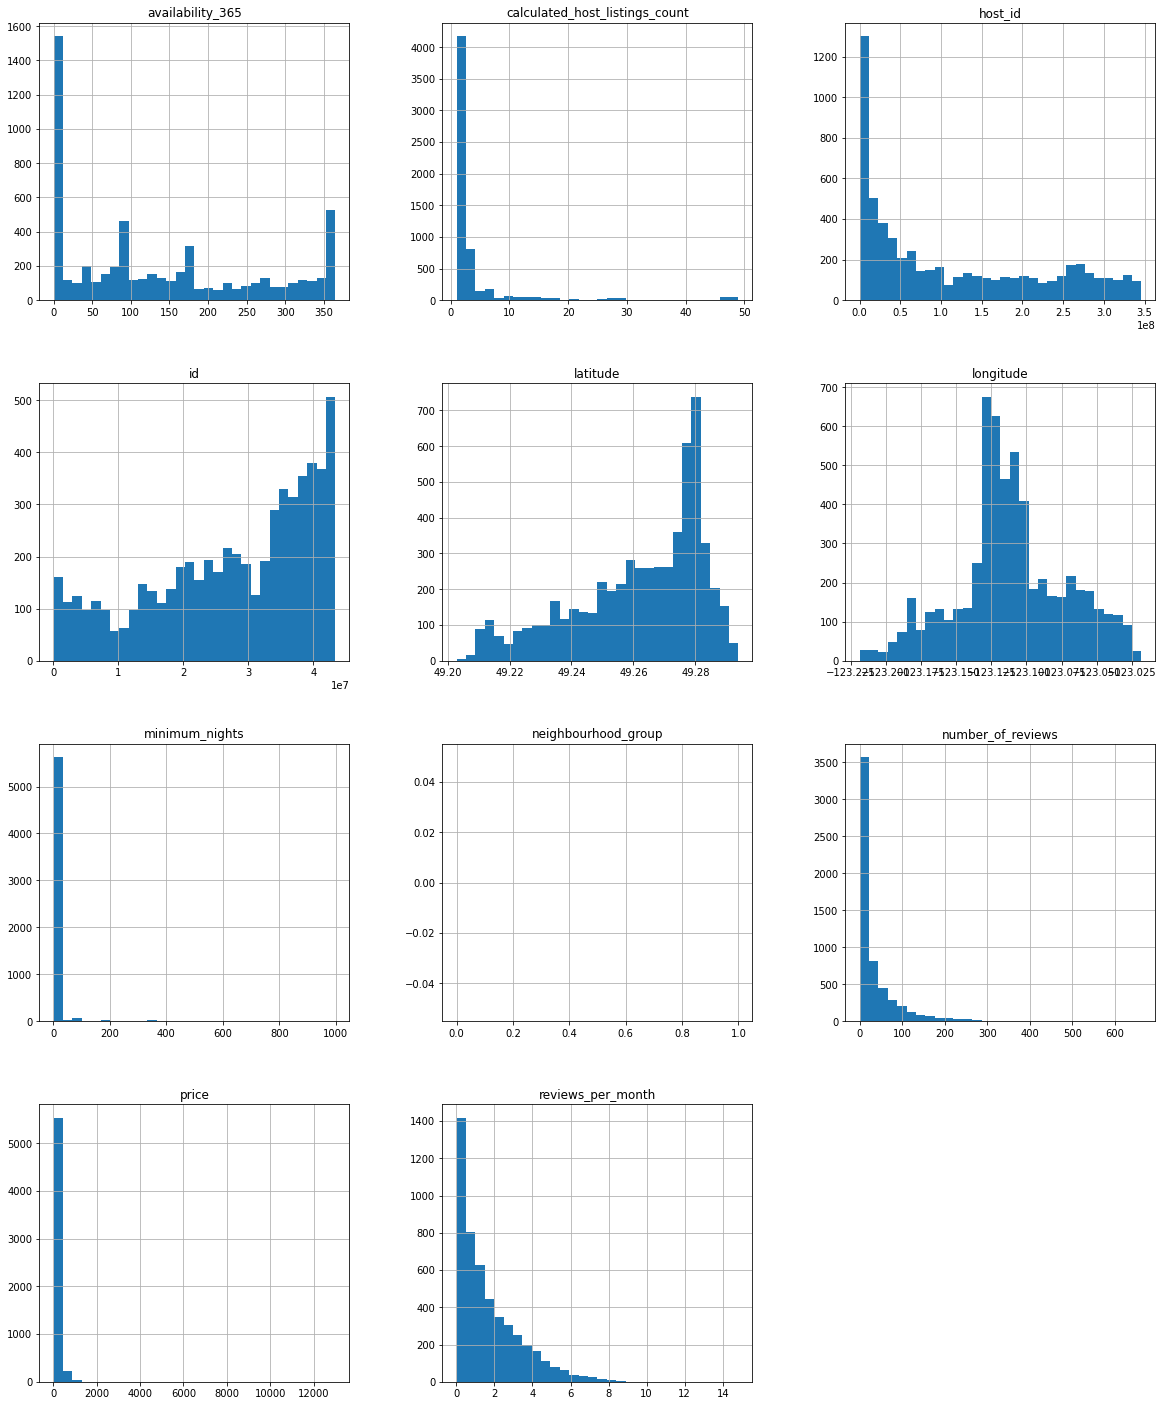

In [ ]:
# plota o histograma das variáveis numéricas
df.hist(bins=30, figsize=(20,25));

### **Q4. Há *outliers* presentes?**

<div align="justify">

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `number_of_reviews`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.
</div>

In [ ]:
# ve o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5806.000000,5806.00000,5806.000000,4938.000000,5806.000000,5806.000000
mean,174.295040,14.15794,35.012745,1.724563,3.598691,137.496900
std,266.424203,34.78132,56.734073,1.667647,7.162984,126.036135
min,13.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.00000,2.000000,0.430000,1.000000,6.250000
50%,125.000000,3.00000,13.000000,1.170000,1.000000,102.000000
75%,200.000000,30.00000,44.000000,2.560000,3.000000,244.000000
max,12999.000000,998.00000,662.000000,14.820000,49.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 200, porém seu valor máximo é 12999.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano, o que não faz sentido, dentro do contexto.

#### Boxplot (Diagrama de caixa)  para *minimum_nights.*

<div align="justify">

**NOTE**: *é uma maneira gráfica de representar a alteração dos dados de uma variável por meio de quartis. Inicialmente desenvolvido por John W. Tukey, o box plot também é conhecido como box-and-whisker plot, diagrama de caixa, diagrama de extremos e quartis e tem a função parecida com um histograma.*

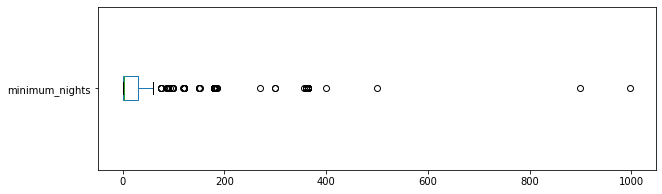

minimum_nights - valores acima de 30:
349 entradas
6.0110%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(10, 3))
plt.show()

# ve quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights - valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot (Diagrama de caixa) para *price.*

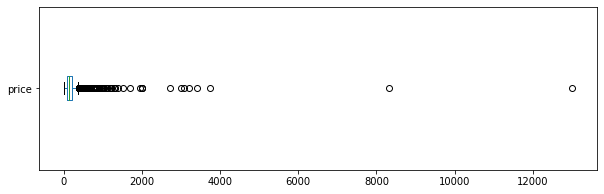


price: valores acima de 1500
13 entradas
0.2239%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(10, 3),)
plt.show()

# ve quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers.*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

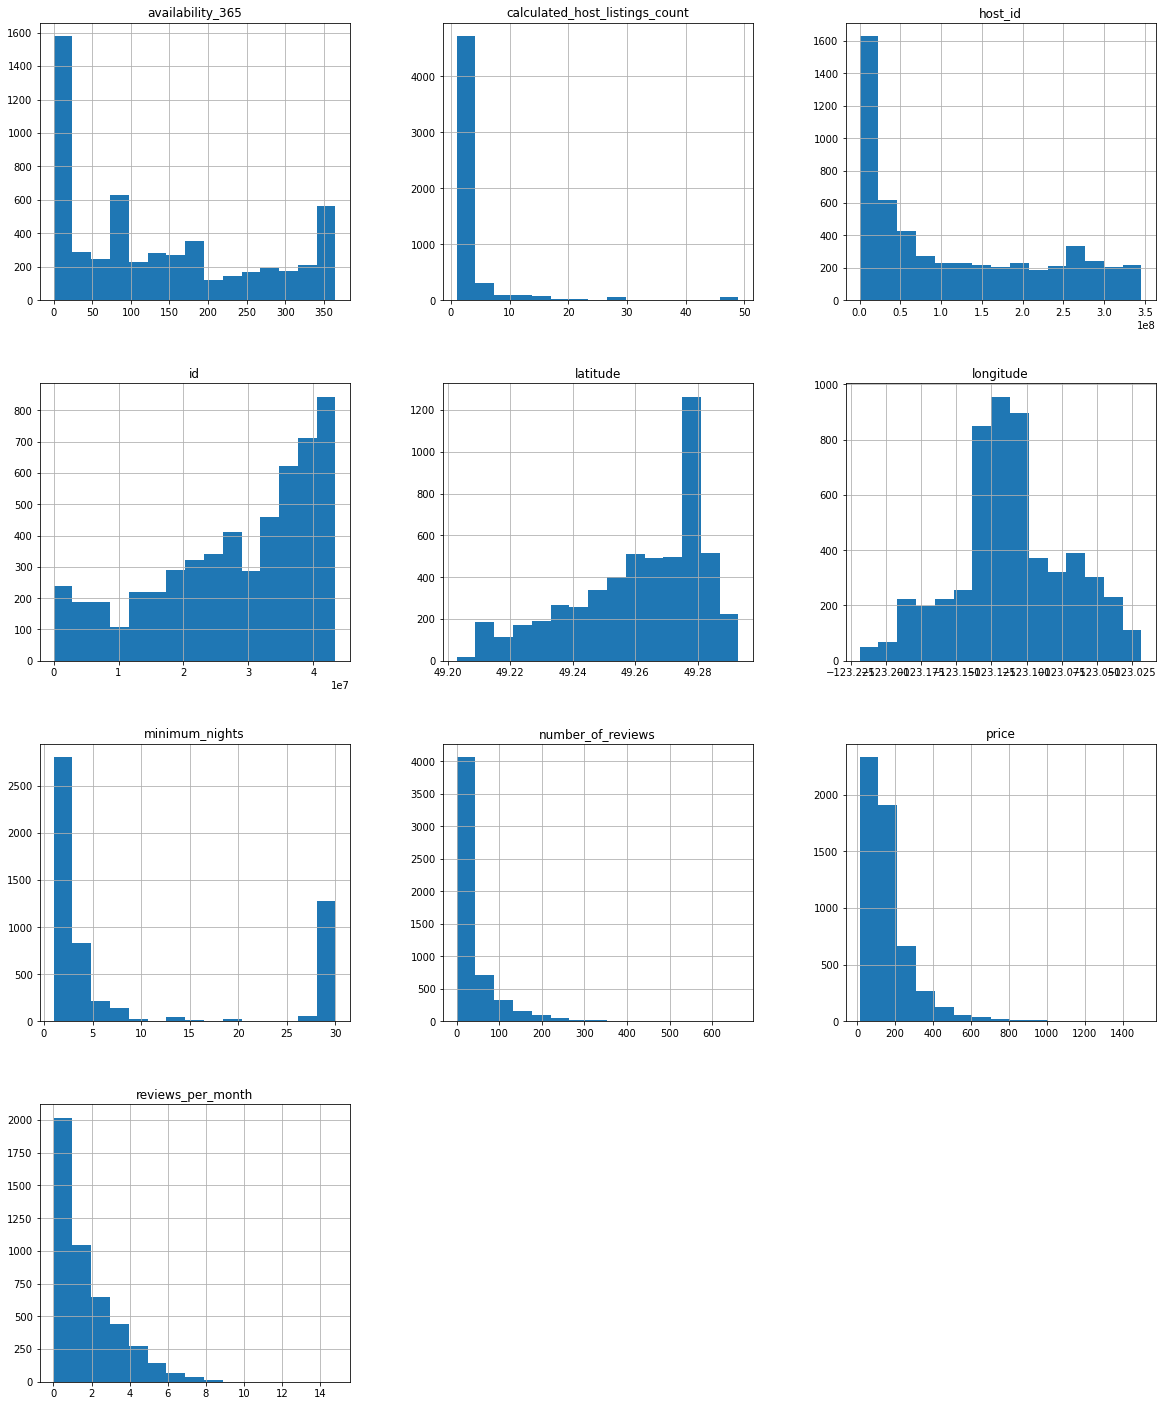

In [ ]:
# remove os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plota o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,25));

### **Q5. Média dos preços de aluguel?**

In [ ]:
# vê a média da coluna `price`
df_clean[['price']].describe()


,price
count,5446.000000
mean,167.748072
std,139.244571
min,13.000000
25%,85.000000
50%,128.000000
75%,200.000000
max,1500.000000


Uma vez limpo o histograma, os dados se apresentam de forma mais concisa, possibilitando uma análise mais acertiva. Temos uma média de C$ 167.00 (*mean*) representando mais da metade dos valores pagos no decorrer do ano.

### **Q6. Correlação existente entre as variáveis**
<div align="justify">

Correlação significa que existe um grau de relacionamento entre duas variáveis (X e Y, por exemplo). No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.
</div>

In [ ]:
# cria uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostra a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.104477,-0.088824,-0.042072,-0.104723,0.074260
minimum_nights,-0.104477,1.000000,-0.138773,-0.277127,0.216893,0.160650
number_of_reviews,-0.088824,-0.138773,1.000000,0.671055,-0.144496,0.055697
reviews_per_month,-0.042072,-0.277127,0.671055,1.000000,-0.162533,0.029949
calculated_host_listings_count,-0.104723,0.216893,-0.144496,-0.162533,1.000000,0.096792
availability_365,0.074260,0.160650,0.055697,0.029949,0.096792,1.000000


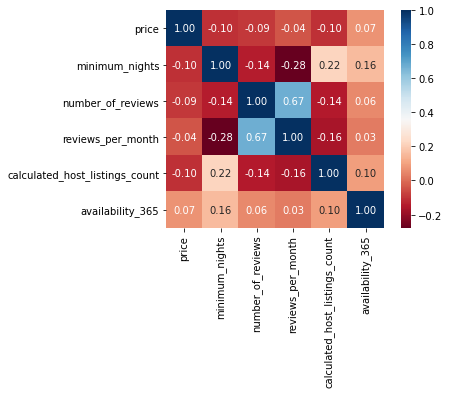

In [ ]:
# plota um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f' , square=True, linecolor='white', annot=True);

<div align="center">

**INSERIR ANÁLISE DO HEATMAP ACIMA!!**
</div>


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
<div align="justify">

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos a casas inteiras, ou apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.
</div>

In [ ]:
# mostra a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3950
Private room       1434
Shared room          49
Hotel room           13
Name: room_type, dtype: int64

In [ ]:
# mostra a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.725303
Private room       0.263313
Shared room        0.008997
Hotel room         0.002387
Name: room_type, dtype: float64

<div align="justify">

Perceba que temos uma predileção para o aluguel de casas/aptos inteiros, seguido por quartos individualizados em casas ou aptos.

- *Entire home/apt*, total de 3.950 reservas, correspondendo a 72,53% do total.

- *Private room*, total de 1.434 reservas, correspondendo a 26,33% do total.

**Conclusão:** uma vez que ambos correspondem a um total de 98,86% das reservas realizadas, sendo assim, se houver a pretensão de investimento neste setor, dê preferência ao aluguel do imóvel inteiro, caso não haja esta possibilidade, opte pela disponibilização de quartos bem estruturados e aconchegantes, sem dúvida você abarcará a segunda maior fatia de hóspedes disponivel, ao menos se estiver em *Vancouver - CA*.
</div>

### **Q8. Qual a localidade mais cara de Vancouver?**



<div align="justify">

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver a média preços por bairros.
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Downtown             206.055911
Kitsilano            198.358407
Dunbar Southlands    197.383648
Downtown Eastside    186.415808
West Point Grey      178.666667
Oakridge             177.548077
Arbutus Ridge        172.530000
West End             171.497041
Shaughnessy          169.469880
South Cambie         166.951220
Name: price, dtype: float64

<div align="justify">

Se analisarmos os resultados acima, podemos concluir que alugar em *Downtown, Kitsilano, Dunbar Southlands e Downtown Eastside* pode sair mais caro, pois representam, na média, os maiores alugueis, entretanto, uma análise mais criteriosa deve levar em conta outros aspectos tais como localidade e representatividade, por exemplo. 
- **Localidade**, nem sempre os maiores valores correspondem aos melhores locais, aspectos tais como sazonalidade podem influenciar.
- **Representatividade**, é importante se certificar que o item analisado possui representatividade no contexto dos dados, a média de preços pode não espelhar a realidade, veja abaixo:
</div>

In [ ]:
# ver quantidade de imóveis (representatividade)
print(df_clean[df_clean.neighbourhood == "Downtown"].shape)
print(df_clean[df_clean.neighbourhood == "Kitsilano"].shape)
print(df_clean[df_clean.neighbourhood == "Dunbar Southlands"].shape)
print(df_clean[df_clean.neighbourhood == "Downtown Eastside"].shape)
print(df_clean[df_clean.neighbourhood == "West Point Grey"].shape)
print(df_clean[df_clean.neighbourhood == "Oakridge"].shape)
print(df_clean[df_clean.neighbourhood == "Arbutus Ridge"].shape)
print(df_clean[df_clean.neighbourhood == "West End"].shape)
print(df_clean[df_clean.neighbourhood == "Shaughnessy"].shape)
print(df_clean[df_clean.neighbourhood == "South Cambie"].shape)

(1252, 15)
(452, 15)
(159, 15)
(291, 15)
(99, 15)
(104, 15)
(100, 15)
(338, 15)
(83, 15)
(82, 15)


<div align="justify">

Para a análise acima, a representatividade possui certo equilíbrio e atende às expectativas da análise, sendo assim, a localidade mais cara é *Downtown*,  entretanto, **isso nem sempre ocorre!**

Veja o exemplo abaixo, retirado de uma análise do Airbnb do Rio de Janeiro:

    df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
    neighbourhood
    **Vaz Lobo                875.666667**
    Engenheiro Leal           800.000000
    Ricardo de Albuquerque    601.200000
    Paciência                 523.555556
    Lagoa                     522.097859
    Abolição                  483.666667
    Leblon                    479.767359
    Anchieta                  475.600000
    Deodoro                   474.000000
    Joá                       472.382979

Podemos concluir que Vaz Lobo é a localidade mais cara do Rio, entretanto, observe abaixo a representatividade da mesma (que possui a maior média de preços):

    print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)
    (3, 15)
**Temos somente 3 entradas num total de 35.870 entradas. Não é representativo e pode gerar distorção da análise!**


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

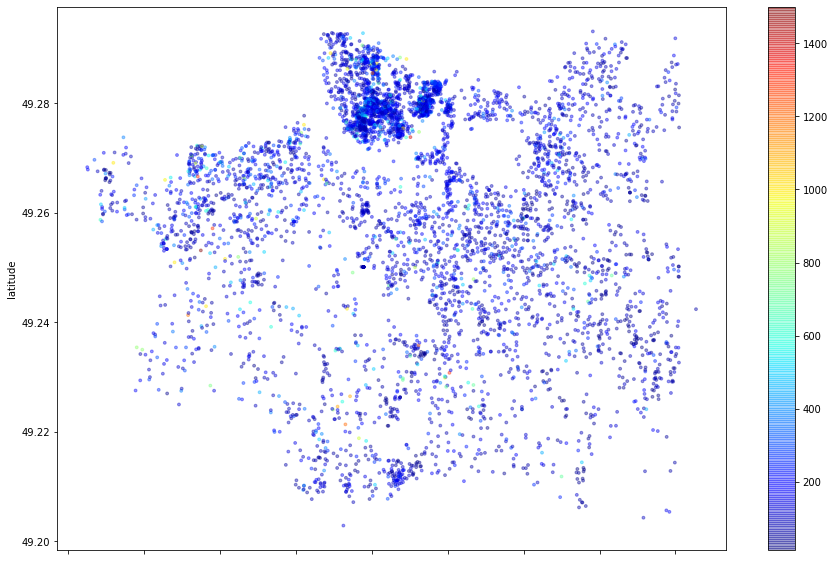

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,5446.000000
mean,9.299119
std,11.992527
min,1.000000
25%,1.000000
50%,2.000000
75%,20.000000
max,30.000000


Podemos observar que temos 9 noites em média.

## Conclusões


<div align="justify">

Foi feita apenas uma análise superficial e exploratória na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

A profundidade de uma análise de dados, pela lógica, é diretamente proporcional ao propósito da extração dos mesmos. Esta análise possui sua limitações, uma vez que a mesma é fruto de um *dataset* com apenas 16 variáveis, destas consideraremos somente preço e quantidades mínimas de noites. Além do propósito didático, não tem a pretensão de executar uma análise aprofundada.

Com esta análise, podemos concluir que:

* A média de preços do aluguel é de C$ 167.00 (cento e sessenta dólares canadenses).

* A predileção é para o aluguel de casas/aptos inteiros, em primeiro lugar, representando 72,53% do total, e em segundo lugar o aluguel de quartos privados, representando 26,33% do total.  

* *Downtown, Kitsilano, Dunbar Southlands e Downtown Eastside* pois representam, na média, os maiores alugueis e possuem a maior quantidade de imóveis a disposição.

* Em média os imóveis são alugados por 9 noites.

Em resumo, as variáveis acima podem reprentar bons parâmetros iniciais para o investimento em aquisição de imóveis para aluguel. 

**NOTE**: em uma próxima análise exploratória, com um conjunto de dados completos, consideraremos um *dataset* com 106 variáveis disponíveis.
</div>
